In [28]:
#Cargamos las bibliotecas a utilizar
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
#Aqui leo el archivo de texto con el que trabajare
df0 = pd.read_csv('meteo-nogal-09.csv', skiprows=0, engine='python')
df0 = df0.replace('Nulo','NA') #Reemplazo los datos Nulos por NA's para poder trabajar con ellos 

In [30]:
df1= pd.DataFrame(df0) #Transformo los datos a un DataFrame

In [31]:
df1.head() #Reviso el inicio del DataFrame

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df1.dtypes #Reviso el tipo de datos que hay en el DataFrame

DATE            object
TIME            object
Unnamed: 2     float64
Unnamed: 3     float64
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
Unnamed: 18    float64
Unnamed: 19     object
Unnamed: 20     object
Unnamed: 21    float64
Unnamed: 22     object
Unnamed: 23     object
Unnamed: 24     object
Unnamed: 25     object
Unnamed: 26     object
Unnamed: 27     object
Unnamed: 28     object
Unnamed: 29     object
Unnamed: 30     object
Unnamed: 31     object
Unnamed: 32     object
Unnamed: 33     object
Unnamed: 34     object
Unnamed: 35     object
dtype: object

In [33]:
#Me deshago de las columnas sin nombre que no aportan ningun tipo de informacion 
df1.drop(df1.columns[18:36],axis=1,inplace=True) 
df1.drop(df1.columns[2:4],axis=1,inplace=True)

In [34]:
df1.head() #Reviso que ya no estas las columnas sin nombre

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,TS,NaN,m/s,m/s,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3
1,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
2,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
3,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
4,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737


In [35]:
df=df1.drop(index=0) #Quito el primer renglon que cuenta con las unidade de cada columna 
df=df.reset_index(drop=True) #Reinicio el indice
df.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
1,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
2,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
3,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737
4,01-01-09,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39


In [36]:
df['Fecha']=df['DATE'] + ' ' + df['TIME'] #Uno las columnas DATE y TIME en una sola columna llamada Fecha 
df.drop(['DATE', 'TIME'],axis=1,inplace=True) #Me deshago de las columnas que ya no utilizare 
df['Fecha'] = pd.to_datetime(df['Fecha']) #Convierto la columna Fecha al tipo datetime

In [37]:
#Convierto las otras columnas al tipo numerico 
df[df.columns[0:14]]=df[df.columns[0:14]].apply(pd.to_numeric, errors='coerce')

In [38]:
df.dtypes #Checo que todo este correcto

u_Avg                 float64
v_Avg                 float64
w_Avg                 float64
t_Avg                 float64
kh20_Avg              float64
net_rad_Avg           float64
shf1_Avg              float64
shf2_Avg              float64
vv_Avg                float64
airT_Avg              float64
rh_Avg                float64
e_sat_Avg             float64
e_Avg                 float64
h2o_hmp_Avg           float64
Fecha          datetime64[ns]
dtype: object

In [39]:
#Me deshago de los datos del 2010, pues solo trabajare con datos del 2009
df=df.drop(df.index[df['Fecha'] >='2010-01-01']) 
df.tail()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,Fecha
52332,0.736,-0.135,12.49,1050.0,-76.38,NaN,NaN,2.595,12.82,0.482,1.480,0.713,5.405,NaN,2009-12-31 23:10:00
52333,0.711,-0.106,12.24,1047.0,-75.03,NaN,NaN,2.517,12.62,0.489,1.460,0.714,5.416,NaN,2009-12-31 23:20:00
52334,0.746,-0.116,11.90,1043.0,-74.88,NaN,NaN,2.380,12.30,0.500,1.430,0.715,5.428,NaN,2009-12-31 23:30:00
52335,0.641,-0.084,11.53,1054.0,-71.33,NaN,NaN,2.182,11.88,0.509,1.391,0.708,5.383,NaN,2009-12-31 23:40:00
52336,0.538,-0.075,11.31,1064.0,-69.40,NaN,NaN,2.102,11.54,0.516,1.360,0.701,5.338,NaN,2009-12-31 23:50:00


In [40]:
#Creo la matriz de correlacion con el DataFrame
corr=df.corr()
corr

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
u_Avg,1.000000,0.241494,0.015906,0.044331,-0.049445,-0.094394,0.089411,0.003542,-0.163176,-0.363548,0.331126,-0.370644,0.103343,0.173845
v_Avg,0.241494,1.000000,0.009572,0.011734,0.155188,-0.117176,0.029321,-0.053846,-0.088159,-0.344386,0.098515,-0.347170,-0.109168,-0.189840
w_Avg,0.015906,0.009572,1.000000,0.601335,0.128426,0.133556,-0.079466,-0.010182,0.912885,-0.338470,0.737544,-0.192107,0.646316,0.125133
t_Avg,0.044331,0.011734,0.601335,1.000000,-0.009929,0.266318,-0.094414,-0.006335,0.529160,-0.231403,0.367252,-0.139445,0.306703,0.576896
kh20_Avg,-0.049445,0.155188,0.128426,-0.009929,1.000000,-0.157759,-0.005268,-0.061590,0.152027,-0.122687,0.024498,-0.123180,-0.126972,-0.326760
net_rad_Avg,-0.094394,-0.117176,0.133556,0.266318,-0.157759,1.000000,-0.206065,-0.027206,0.162470,0.334375,-0.266374,0.385945,0.074294,0.056376
shf1_Avg,0.089411,0.029321,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207
shf2_Avg,0.003542,-0.053846,-0.010182,-0.006335,-0.061590,-0.027206,0.059003,1.000000,-0.017229,0.078023,0.017651,0.081718,0.051809,0.151206
vv_Avg,-0.163176,-0.088159,0.912885,0.529160,0.152027,0.162470,-0.089608,-0.017229,1.000000,-0.223757,0.582047,-0.091182,0.521232,-0.193064
airT_Avg,-0.363548,-0.344386,-0.338470,-0.231403,-0.122687,0.334375,-0.121637,0.078023,-0.223757,1.000000,-0.484177,0.964464,0.088203,0.464621


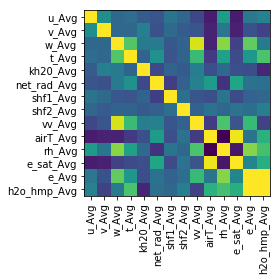

In [41]:
#Heat Map creado con Matplotlib
fig,ax = plt.subplots()
im = ax.imshow(corr)
ax.set_xticks(np.arange(len(corr)))
ax.set_yticks(np.arange(len(corr)))
ax.set_xticklabels(corr)
ax.set_yticklabels(corr)
plt.setp(ax.get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()

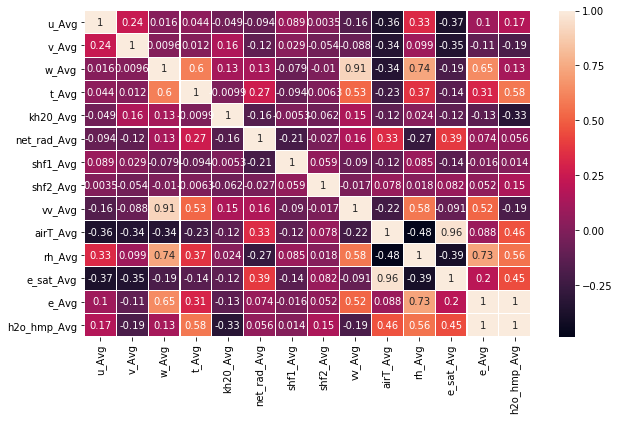

In [42]:
#Heat Map creado con Seaborn
plt.figure(figsize = (10, 6))
ax=sns.heatmap(corr,annot=True,linewidths=.10)

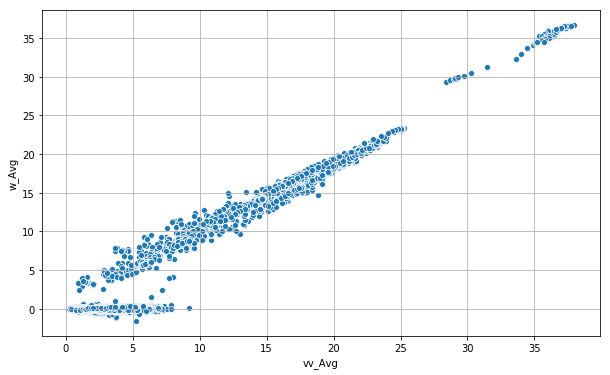

In [43]:
#Grafica de dispersion de puntos para datos de 'vv_Avg' y 'w_Avg' con una correlacion de 0.91
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x=df['vv_Avg'],y=df['w_Avg'])
plt.grid()

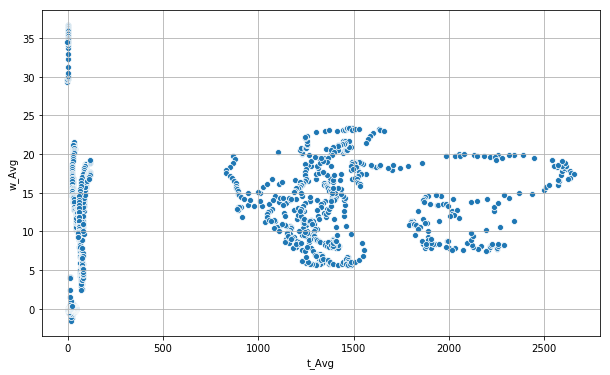

In [44]:
#Grafica de dispersion de puntos para datos de 't_Avg' y 'w_Avg' con una correlacion de 0.6
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x=df['t_Avg'],y=df['w_Avg'])
plt.grid()

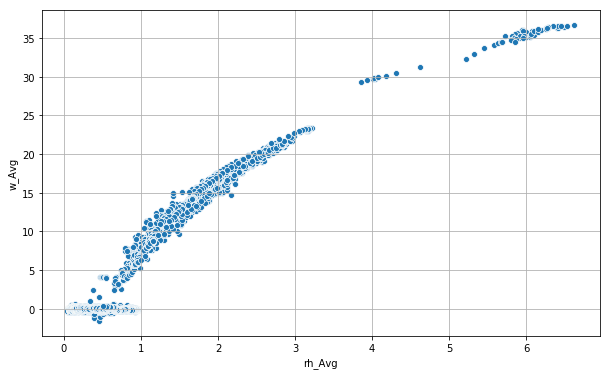

In [45]:
#Grafica de dispersion de puntos para datos de 'rh_Avg' y 'w_Avg' con una correlacion de 0.74
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x=df['rh_Avg'],y=df['w_Avg'])
plt.grid()

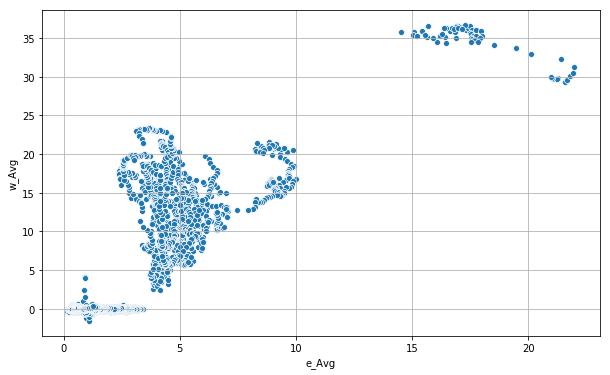

In [46]:
#Grafica de dispersion de puntos para datos de 'e_Avg' y 'w_Avg' con una correlacion de 0.65
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x=df['e_Avg'],y=df['w_Avg'])
plt.grid()

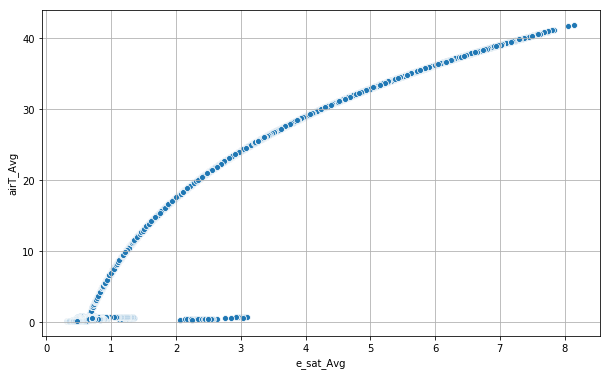

In [47]:
#Grafica de dispersion de puntos para datos de 'e_sat_Avg' y 'airT_Avg' con una correlacion de 0.96
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x=df['e_sat_Avg'],y=df['airT_Avg'])
plt.grid()

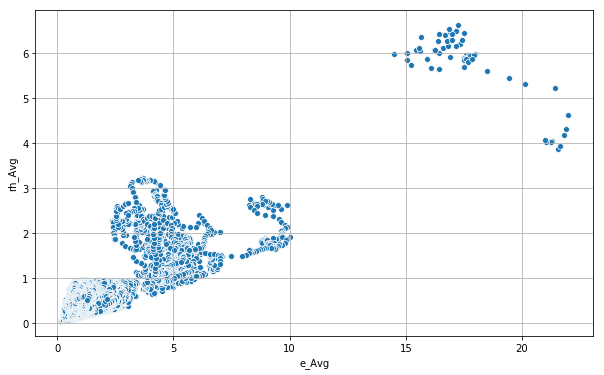

In [48]:
#Grafica de dispersion de puntos para datos de 'e_Avg' y 'rh_Avg' con una correlacion de 0.73
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x=df['e_Avg'],y=df['rh_Avg'])
plt.grid()